<div align="center">

# IHE Delft

## Transient Groundwater Flow Course

## Chapter 6: Wells (Theis and Hantush)

prof. dr.ir. T.N.Olsthoorn

tolsthoorn@gmail.com

Feb. 2025

</div>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc, k0 as K0, k1 as K1, exp1 as Wth

# The Theis well (confined aquifer or unconfiend if D is constant)

The drawdown according to Theis is given by

$$ s(r, t) = \frac{Q}{4 \pi kD} \mathtt{W}(u), \,\,\,\,\,u=\frac{r^2 S}{4 kD t}$$

The theis well function is in the scipy.special module known as `exp1`

$$ s(r, t) = \frac{Q}{4 \pi kD} \mathtt{exp1}(u), \,\,\,\,\,u=\frac{r^2 S}{4 kD t}$$

We'll show the Theis well function as a function of $\frac 1 u = \frac{4 kD t}{r^2 S}$ and as a function of $u = \frac{r^2 S}{4 kD t}$. The first can be seen as a function of $t$ for fixed values of $r$ and the second as a function of $r$ at fixed values of $t$. We will do this side by side. The first pair have both linear axes, the second double log (called type curves in the literature) and the third pair has a linear vertical and a logarithmic horizontal scale. Notice that the vertical axis was inverted to show increasing drawdown als a lowering, but, of course, this is only esthetic. The third pair of curves is most useful in practice as it is easy to determine the transmissivity from  them using the drawdown per log cycle, where the drawdown graph is linear.

First show the Theis well function on linear scales versus $1/u$ and versus $u$.

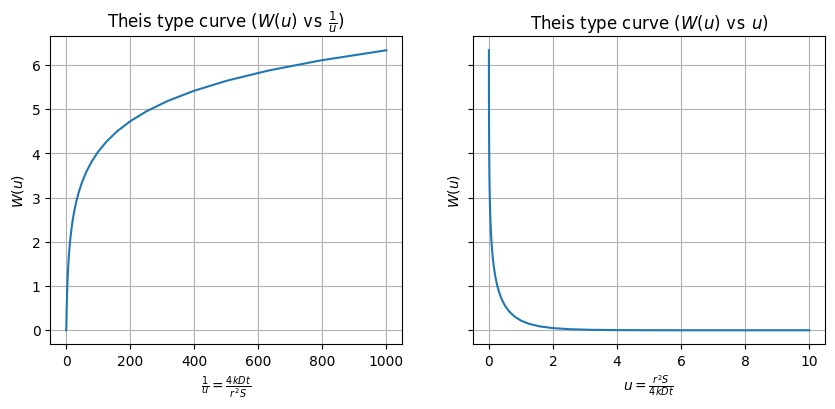

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs} \,\, \frac{1}{u}$)", xlabel=r'$\frac{1}{u} = \frac{4 kD t }{r^2 S}$', ylabel=r'$W(u)$',
        xscale='linear', yscale='linear')
ax1.grid(True)

ax2.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs}\,\, u$)", xlabel=r'$u = \frac {r^2 S}{4 kD t}$', ylabel=r'$W(u)$', xscale='linear', yscale='linear')
ax2.grid(True)

u = np.logspace(-3, 1, 41)
ax1.plot(1/u, Wth(u), '-')
ax2.plot(u, Wth(u), '-')

plt.show()

Then with both axes logarithmic. This is what is known as Theis type curves.

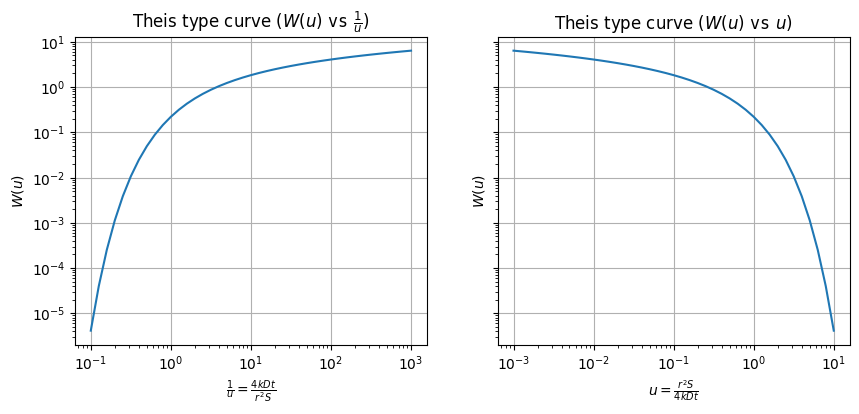

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs} \,\, \frac{1}{u}$)", xlabel=r'$\frac{1}{u} = \frac{4 kD t }{r^2 S}$', ylabel=r'$W(u)$',
        xscale='log', yscale='log')
ax1.grid(True)

ax2.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs}\,\, u$)", xlabel=r'$u = \frac {r^2 S}{4 kD t}$', ylabel=r'$W(u)$',
        xscale='log', yscale='log')
ax2.grid(True)

u = np.logspace(-3, 1, 41)
ax1.plot(1/u, Wth(u), '-')
ax2.plot(u, Wth(u), '-')

plt.show()

Same but the vertical scale linear and only the horizontal scale logarithmic. This shows that the drawdow line becomes straight after sufficient long times.

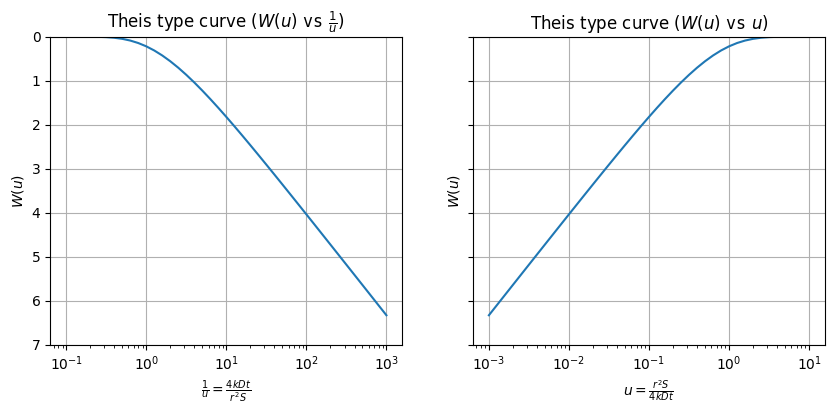

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs} \,\, \frac{1}{u}$)", xlabel=r'$\frac{1}{u} = \frac{4 kD t }{r^2 S}$', ylabel=r'$W(u)$',
        xscale='log', yscale='linear', ylim=(7, 0))
ax1.grid(True)

ax2.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs}\,\, u$)", xlabel=r'$u = \frac {r^2 S}{4 kD t}$', ylabel=r'$W(u)$',
        xscale='log', yscale='linear', ylim=(7, 0))
ax2.grid(True)

u = np.logspace(-3, 1, 41)
ax1.plot(1/u, Wth(u), '-')
ax2.plot(u, Wth(u), '-')

plt.show()

Next we compare the curves above with the famous logarithmic approximation of the Theis well function, which is derived from the power series expansion of the well function, taking $u$ sufficiently small so that all terms to the right of $\ln u$ vanish:

$$W(u) = -\gamma - \ln(u) + u - \frac{x^3}{2 \times 2!} + \frac{u^3}{3 \times 3!} - ...$$

with $\gamma \approx 0.577216...$

$$W(u) \approx \ln(e^{-\gamma}) + \ln \left(\frac 1 u \right)$$

or

$$W(u) \approx \ln \left(\frac{e^{-\gamma} 4 kD t}{r^2 S}\right)$$

and because $e^{-0.577216} 4 \approx 2.25$ we finally obtain

$$W(u) \approx \ln \left(\frac{2.25 kD t}{r^2 S}\right)=\ln\left(\frac {0.563}{u}\right)$$


Continuing with the third pair of graphs above, we can compare the Theis graphs with their approximation for small-enough values of $u$, where the well function becomes linear.

For small-enough values of u we have the following approximation

$$ s(x,t) = \frac Q {4 \pi kD} W(u) \approx \frac {Q} {4 \pi kD} \ln \left(\frac{2.25 kD t}{r^2 S}\right)$$

To express also the argument of the $\n(...) in terms of u
$$ \frac{2.25 kD t}{r^2 S} = \frac{0.563}{u}$$

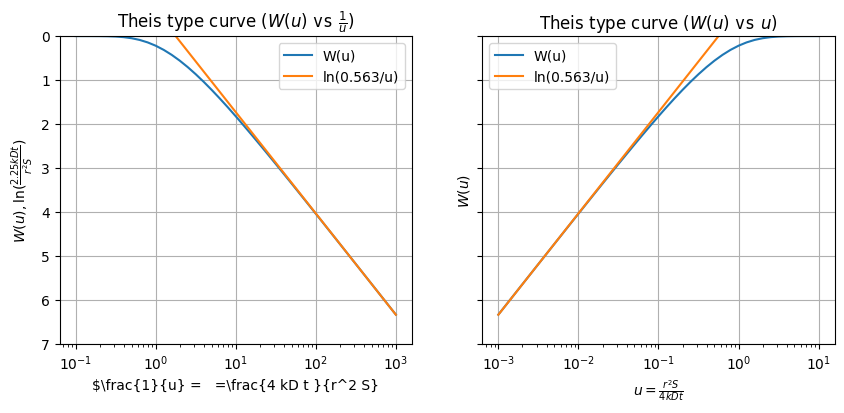

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax1.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs} \,\, \frac{1}{u}$)", xlabel=r"$\frac{1}{u} =   =\frac{4 kD t }{r^2 S}", ylabel=r"$W(u), \ln (\frac{2.25 kD t}{r^2 S} )$",
        xscale='log', yscale='linear', ylim=(7, 0))
ax1.grid(True)

ax2.set(title=r"Theis type curve ($W(u)\,\, \mathtt{vs}\,\, u$)", xlabel=r'$u = \frac {r^2 S}{4 kD t}$', ylabel=r'$W(u)$',
        xscale='log', yscale='linear', ylim=(7, 0))
ax2.grid(True)

u = np.logspace(-3, 1, 41)
ax1.plot(1/u, Wth(u), '-', label="W(u)")
ax1.plot(1/u, np.log(0.563 / u), '-', label="ln(0.563/u)")

ax2.plot(u, Wth(u), '-', label="W(u)")
ax2.plot(u, np.log(0.563 / u), '-', label="ln(0.563/u)")

ax1.legend()
ax2.legend()
plt.show()

Using the simplified Theis formula (with the log) one can always determine the transmissivity if the measured drawdown line has a straight portion, simply by measuring the drawdown per log cycle. This is because the drawdown difference $s(x, 10t) - s (x, t)$ becomes:

$$ s(x, 10t) - s(x, t) = \frac Q {4 \pi kD} \ln(10) = \frac{2.3 Q}{4 \pi kD}$$

from which $kD$ follows, because the drawdown difference and the flow are both known. Factors affecting the absolute value of the drawdown like partial penetration of the well screen or clogging of the well face caused by a mud skin, play no role, because they drop out when the difference of the two drawdown is taken.

To determine the storage coefficient, set the drawdown $s(x,t)$ equal to zero. Which implies that the argument of the logarithm is 1. Hence

$$ \frac{2.25 kD t_{s=0}}{r^2 S} = 1$$

With given radius $r$, $t_{s=0}$ from the intersection of the straight line approximation and the line $s=0$ and $kD$ determined above, we find the storage coefficient $S$.

## Radius of influence

The previous formula relates the distance $r$ where the approximate drawdown equals 0 with time. It shows that this radius increases with time. We can call this radius the "radius of influence" which, therefore equals:

$$ r_{\mathtt{influence}} = \sqrt{\frac{2.25 kD t}{s}} $$

beyond this radius there is practically no drawdown (yet).

Let's show the radius of influence graphically. The graphs show the drawdown according to Theis and the approximate drawdown as a function of time for different values of $r$. The area of influence, or the time at which the approximate drawdown intersects zero at the radius of influence is indicated by the red dots. It's clear how the radius of influence moves to the right with time.

To read this graph easily, imagine that dots given the time at which the radius of influence matches the distances used for each line in the graph.

We could just as well plot the drawdown as a function of r for different times, then the intersection of the approximation with $s=0$ is the radius where the drawdown equals zero for each given time. This, of course, is the radius of influence at each time. To show this is left to the student.


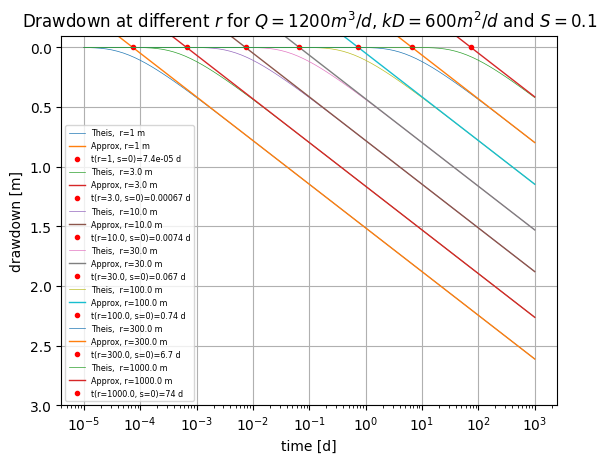

In [24]:
S, kD, Q = 0.1, 600, 1200
t = np.logspace(-5, 3, 81)
rs = [1, 3., 10., 30., 100., 300., 1000.]

fig, ax = plt.subplots()
ax.set(title=f"Drawdown at different $r$ for $Q={Q} m^3/d$, $kD={kD} m^2/d$ and $S={S}$",
        xlabel="time [d]", ylabel="drawdown [m]", xscale="log", ylim=(3, -0.1))
ax.grid(True)


for r in rs:
    u = r ** 2 * S / (4 * kD * t)
    s1 = Q / (4 * np.pi * kD) * Wth(u)
    s2 = Q / (4 * np.pi * kD) * np.log(0.563 / u)    
    ax.plot(t, s1, lw=0.5, label=f"Theis,  r={r} m")
    ax.plot(t, s2, lw=1.0, label=f"Approx, r={r} m")
    
    t0 = (r ** 2 * S) / (2.25 * kD)
    ax.plot(t0, 0, 'r.', label=f"t(r={r}, s=0)={t0:.2g} d" )

ax.legend(fontsize='xx-small')
    


## The specific discharge at a distance $r$ from the well

$$ Q_r = -kD 2 \pi r \frac{\partial s(r, t)}{\partial r} $$

with

$$ s(r, t) = \frac{Q}{4 \pi kD} \intop_u^\infty \frac{e^{-y}}{y}dy $$

Therefore, we have, with $\frac{\partial u}{\partial r}=\frac{\partial}{\partial r}\left(\frac{r^2 S}{4 kD t}\right)=\frac{2}{r}\frac{r^2 S}{4 kD t}=\frac{2 u}{r}$:

$$ Q_r = - kD 2 \pi r \frac Q {4 \pi kD}\frac{-e^{-u}}{u} \frac{2 u}{r}$$

so that

$$ Q_r = Q e^{-u} $$

This implies that when $u \rightarrow 0$, that is, when $t\rightarrow\infty$ then $Q_r \rightarrow Q$. So that the discharge through a ring of radius $r$ always tends to the extraction from the well, $Q$. The same is true for $r\rightarrow 0$ for any value of $t$. Think why this makes sense.

With $Q_r$ now known, we also have the specific discharge as any $r$. It equals

$$ q_{r, t} = \frac{Q_r}{2 \pi r} = \frac{Q}{2 \pi r} e^{-u}$$

The components of $q_r$, i.e. $q_x, q_y$ are

$$q_x = \frac{Q e^{-u}}{2 \pi r} \cos(\alpha),\,\,\, q_y=\frac{Q e^{-u}}{2 \pi r}\sin(\alpha)$$

with $x, y$ the coordinates of the specific discharge  and $x_w, y_w$ the coordinates of the well we  have

$$\cos(\alpha) = \frac{x_w - x}{r},\,\,\,\,\sin(\alpha) =\frac{y_w - y}{r}$$

And so,

$$q_x = \frac{Q e^{-u}}{2 \pi}\left( \frac{x_w - x}{r^2} \right),\,\,\,
 q_y=\frac{Q e^{-u}}{2 \pi}\left(\frac{y_w - y}{r^2}\right)$$

 This give the specific discharge at an arbitrary point caused by the extracting well. To get the groundwater velocity, you have to divide by the porosity.

 To get the specific discharge at this point due to all wells in a well field, we just have to superimpose the vector caused by each of the wells.

 Let us now show the drawdown due to a number of wells in a well field and the groundwater velocity field.

In [25]:
import pandas as pd

columns = ['name', 'rw', 'x', 'y', 'Q', 'tstart']
data = [['well1', 0.2, 100., 34., 600, 20.],
        ['well2', 0.2, -30., -25., 400., 50.],
        ['well3', 0.2, -89, 55., 500, 34.],
        ['well4', 0.2, 55., -45., 500., 47.],
        ['well5', 0.2, -50., 70., 400., 30],
        ['well6', 0.2, 53., 23., 300., 23],
        ['well7', 0.2, 70., 78., 500., 19.]]
wells = pd.DataFrame(data=data, columns=columns)
wells

name   rw      x     y      Q  tstart
0  well1  0.2  100.0  34.0  600.0    20.0
1  well2  0.2  -30.0 -25.0  400.0    50.0
2  well3  0.2  -89.0  55.0  500.0    34.0
3  well4  0.2   55.0 -45.0  500.0    47.0
4  well5  0.2  -50.0  70.0  400.0    30.0
5  well6  0.2   53.0  23.0  300.0    23.0
6  well7  0.2   70.0  78.0  500.0    19.0

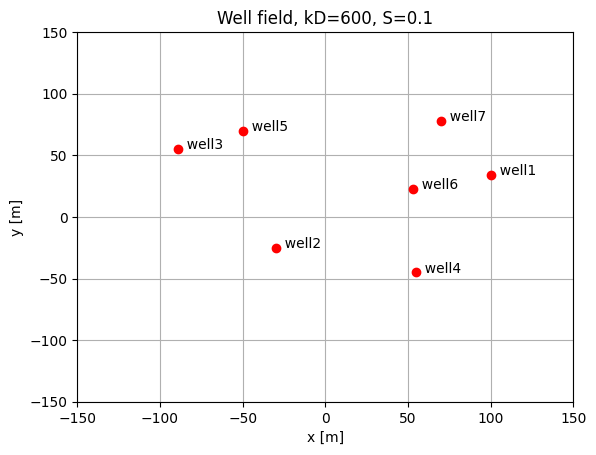

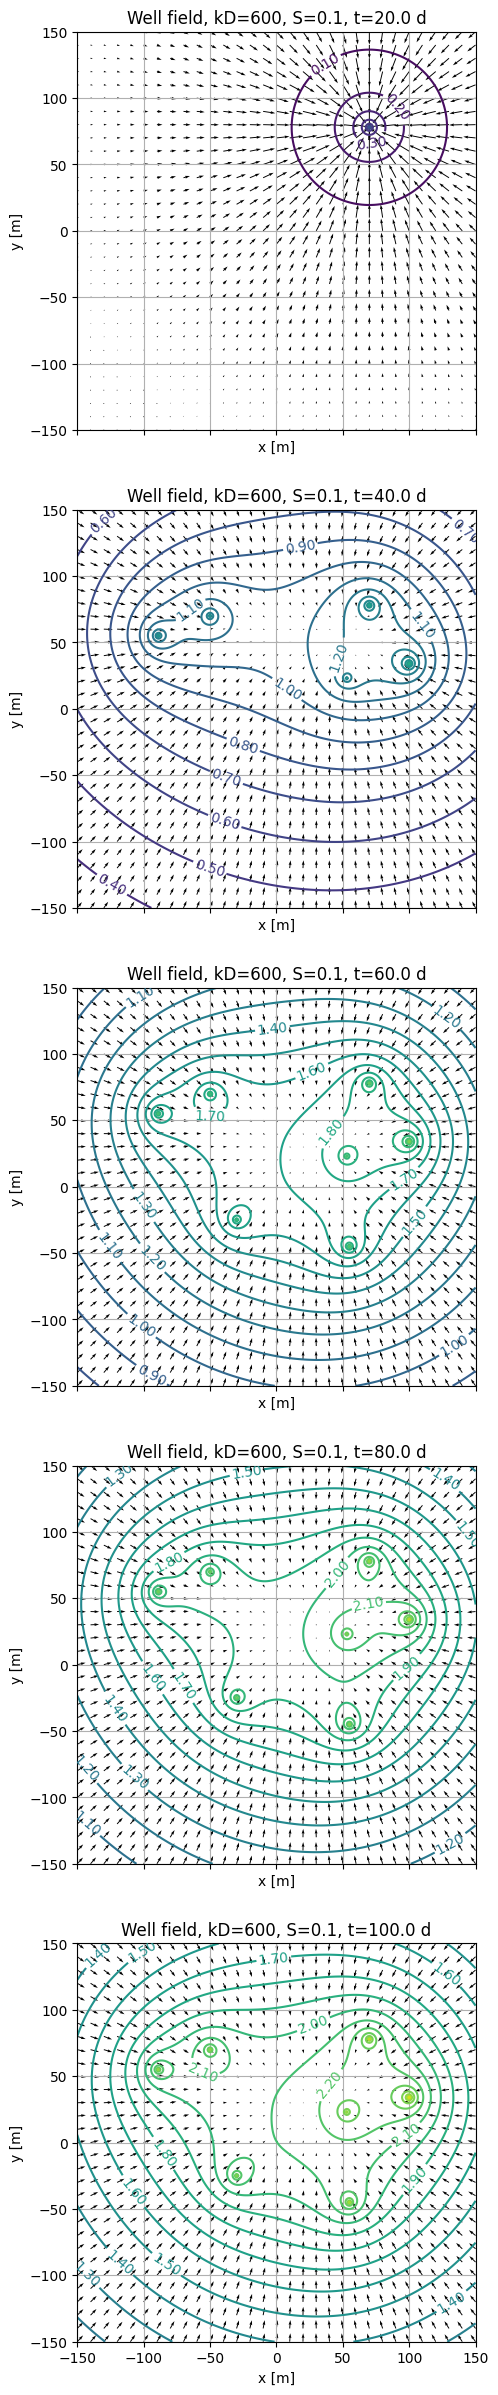

In [26]:
w1 = wells.loc[0]
w2 = wells.loc[1]
w3 = wells.loc[2]
w4 = wells.loc[3]
w5 = wells.loc[4]
w6 = wells.loc[5]
w7 = wells.loc[6]

ws = [w1, w2, w3, w4, w5, w6, w7]

xmin, xmax, ymin, ymax = -150., 150., -150., 150.

# Plot the well locations
fig, ax = plt.subplots()
ax.set(title=f'Well field, kD={kD}, S={S}', xlabel='x [m]', ylabel='y [m]')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.grid(True)
for w in ws:
    ax.plot(w['x'], w['y'], 'ro')
    ax.text(w['x'], w['y'], "  " + w['name'])
plt.show()

# Set the grid points to use for contouring and vector plotting
x = np.linspace(xmin, xmax, 301)
y = np.linspace(ymin, ymax, 301)
X, Y = np.meshgrid(x, y) # convert x, y 1D grids into X, Y 2D grids

# The times for which we want a map plotted with contours and discharge vectors
ts = np.linspace(20., 100., 5)

# Generate a pipe of plots one for each time
fig, axs = plt.subplots(len(ts), 1, sharex=True, sharey=True, figsize=(6, 30))

# Then run for each time plotting on on each plot
for t, ax in zip(ts, axs):
    ax.set(title=f'Well field, kD={kD}, S={S}, t={t} d', xlabel='x [m]', ylabel='y [m]', aspect=1.0)
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.grid(True)

    # (Re)initialize the head and discharge vector arrays with zeros as start values
    s = np.zeros_like(X)
    qx = np.zeros_like(X)
    qy = np.zeros_like(Y)
    
    # Run over each well and do the superposition
    for w in ws:
        if t <= w['tstart']:
            continue
        
        # Drawdown at all grid points
        r = np.sqrt((w['x'] - X) ** 2 + (w['y'] - Y) ** 2)
        r[r < w['rw']] = w['rw']
        u = r ** 2 * S  / (4 * kD * (t - w['tstart']))
        s += w['Q'] / (4 * np.pi * kD) * Wth(u)
        
        # Specific discharge at all grid points
        qx += w['Q'] * np.exp(-u) / (2 * np.pi * r) * (w['x'] - X)
        qy += w['Q'] * np.exp(-u) / (2 * np.pi * r) * (w['y'] - Y)
        
    # Set levels and contour using these levels
    levels = np.linspace(0, 3, 31)
    CS = ax.contour(X, Y, s, levels=levels)
    ax.clabel(CS, levels=CS.levels, fmt="%.2f")
    
    # Plot the specific discharge vectors (using efficient function quiver)
    # The grid X, Y is too dense to see the discharge vectors, so only use every 10th point
    ax.quiver(X[::10, ::10], Y[::10, ::10], qx[::10, ::10], qy[::10, ::10])

plt.show()

# Hantush well function (transient flow in a leaky aquifer)

The Hantush drawdown is 

$$ s(x, t) = \frac{Q}{4 \pi kD} W_h \left(u, \frac r \lambda \right), \,\,\,\,u=\frac{r^2 S}{4 kD t}, \,\,\,\lambda=\sqrt{kDc}$$

with $c$ [d] the resistance of the covering aquitard in days and $\lambda$ the well-known characteristic length or spreading length of the leaky aquifer.

Hantush's well function is as follows

$$W_h \left(u, \frac r \lambda \right) = \intop_u^\infty \frac{e^{-y - \frac{\left(\frac{r}{2\lambda}\right)^2}{y}}}{y} dy$$



The Hantush well function is similar to the Theis well function but it has the additional leaking factor in it. It's immediately clear that when $\lambda\rightarrow \infty$ the Hantush well function becomes the same as the Theis well function. From the hydraulogist's point of view the reason is clear, because this is the case when $c\rightarrow \infty$ or equally $\lambda \rightarrow \infty$, i.e. when the aquifer becomes confined with zero leakage. This is also the case for $ r\rightarrow 0$. This is harder to grab intuitively, but it implies that for observation wells very close to the well the Hantush drawdown will, at least initially look like that of Theis.

Contrary to the Theis well function, the Hantush well function is not available in the module `scipy.special`. Hence we'll have to implement it ourselves. One way to do it is to just apply numerical computation of the integral. Integration can be done efficiently using the function `scipy.integrate.quad` which we'll import.

An efficient implementation is the following:

In [27]:
from scipy.integrate import quad

def Wh(u, rho):
    """Return Hantus's well function.
    This method is efficient and accurate to 1e-9.    
    """
    def integrand(y, rho):
        """Return the argument under the integral for an y value"""
        return np.exp(-y - (rho / 2) ** 2 / y) / y
    def w(u, rho):
        """Return the integral of the kernal between boundaries u and np.inf"""
        return quad(integrand, u, np.inf, args=(rho))
     # Turn w into an efficient vectorized function that accept entire arrays
    wh = np.vectorize(w)
    
    # Note that wh yields both the result and its error estimate,
    # we discard the latter, which we captured in variable named `_`
    result, _ = wh(u, rho)
    return result

Now let's compare Theis and Hantush well functions, by showing the Type curves

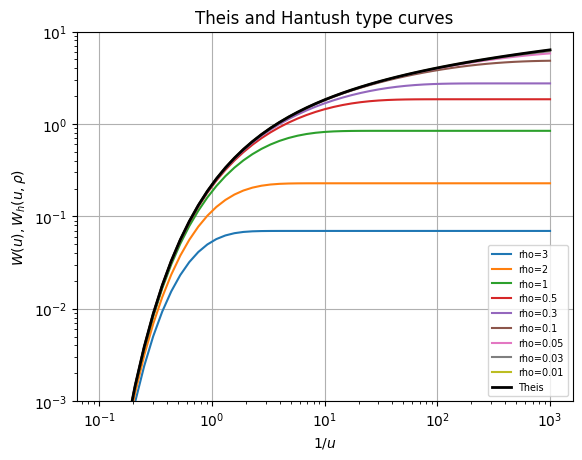

In [28]:
u = np.logspace(-3, 1, 51)
rhos = [3, 2, 1, 0.5, 0.3, 0.1, 0.05, 0.03, 0.01]

fig, ax = plt.subplots()
ax.set(title="Theis and Hantush type curves", xlabel=r'$1/u$', ylabel=r'$W(u), W_h(u, \rho)$',
       xscale='log', yscale='log')

for rho in rhos:
    ax.plot(1/u, Wh(u, rho), label=f'rho={rho}')
    
ax.plot(1/u, Wth(u), 'black', lw=2, label='Theis')
ax.grid(True)
ax.set_ylim(1e-3, 10.)
ax.legend(loc='lower right', fontsize='x-small')

The figure shows the well functions versus $1/u$ i.e. which is proportional to time. It's seen that the Theis drawdown never reaches equilibrium, but the Hantush function does (lines become horizontal). For any given $r$, the final drawdown is smaller the lower the spreading length $\lambda$, and also, the drawdown becomes steady state earlier the lower $\lambda$. This makes sense, because a lower $\lambda$ (in fact $c$) implies more leakage.

The character of the Hantush drawdown can be well visualized by plotting the same curves on half-log scale. To show the drawdown downwards, we inverted the y-axis using the set_ylim() function.

The drawdown of $Wh(u, \rho)$ versus $\log(1/u)$ shows a bending point at half the final drawdown. The value where this is the case is given by

$$ u_{50\%}=\frac{r^2 S }{4 kD t_{50\%}} = \frac{r}{2 \lambda} $$

so for

$$ \frac 1 u = \frac{2 \lambda} r$$

we will plot this points as red dots on the graphs.

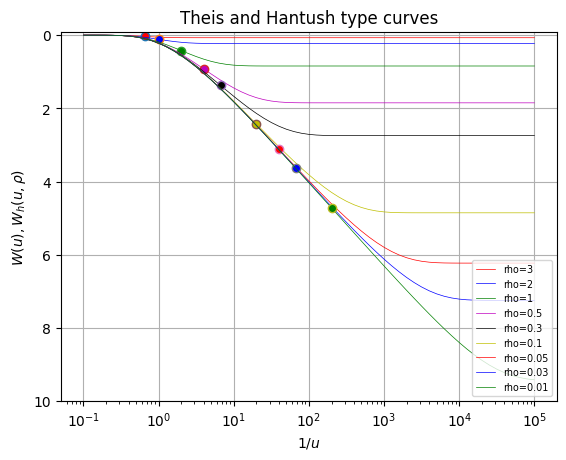

In [29]:
from itertools import cycle

u = np.logspace(-5, 1, 61)
rhos = [3, 2, 1, 0.5, 0.3, 0.1, 0.05, 0.03, 0.01]

fig, ax = plt.subplots()
ax.set(title="Theis and Hantush type curves", xlabel=r'$1/u$', ylabel=r'$W(u), W_h(u, \rho)$',
       xscale='log', yscale='linear')

clrs = cycle('rbgmky')
for rho in rhos:
    clr = next(clrs)
    ax.plot(1/u, Wh(u, rho), color=clr, lw=0.5, label=f'rho={rho}')
    ax.plot(2 / rho, Wh(rho / 2, rho), 'o', mfc=clr)
    
ax.grid(True)
ax.set_ylim(10., -0.1)
ax.legend(loc='lower right', fontsize='x-small')

For the Hantush well function, we do not have a simple function that gives us the flow across a ring of radius $r$. However, we can always compute it numerically:

$$Q_r = -kD 2 \pi r \frac{\partial s(x, t)}{\partial r} $$

with

$$ s(r, t) = \frac Q {4 \pi kD} W_h\left(u, \frac r {\lambda} \right)$$

Where

$$ s(r, t) = \frac Q {4 \pi kD} \intop_u^\infty \frac{e^{-y - \frac{\left(\frac r {2 \lambda}\right)}{y}}} y dy$$

Taking the derivative of the Hantush function with respect to is quite complex (I asked ChatGPT). So instead we can just take a numerical derivative. First make a function that computes the s a function of $r$ and then apply the numerical differentiation:

In [30]:
# Define the integrand function
def integrand(y, r, L):
    return np.exp(-y - (r / (2 * L)) ** 2 / y) / y

# Define the function s(r, t)
def sH_(r, t, S, kD, c):
    L = np.sqrt(kD * c)
    s = np.zeros_like(t)
    for i, ti in enumerate(t):    
        u = (r**2 * S) / (4 * kD * ti)  # Lower integration bound
        s[i], _ = quad(integrand, u, np.inf, args=(r, L))
    return s

# Compute numerical derivative using finite difference
def ds_dr(r, t, Q, S, kD, c, dr=1e-6):    
    return Q / (4 * np.pi * kD) * (sH_(r + dr, t, S, kD, c) - sH_(r - dr, t, S, kD, c)) / (2 * dr)

def QH_steady(r, Q, kD, c):
    """Return steady state Qr for leaky aquifer."""
    L = np.sqrt(kD * c)
    return Q * r / L * K1(r / L)

With the above numerical derivation we can compute the flow $Q_r$ also for the Hantush case.

Let's compare the result with that of Theis. That is, for small $r$ we expect the results to be the same or similar, but for larger $r$ $Q_r$ for Hantush must go to zero, while for Theis this is not the case. Or, more exact, for Theis, $Q_r \rightarrow Q$ while for Hantush $Q_r \rightarrow Q\, \frac r {\lambda} K_1\left(\frac r {\lambda}\right)$

The derivation is here:

$$ s = \frac{Q}{2 \pi kD} K_0(r / \lambda)$$

So the Q at distance $R$ is

$$Q(r) = +\frac{kD}{\lambda} 2 \pi r \frac Q {2 \pi kD} K_1(\frac r \lambda)$$

Simplified, we have

$$Q(r) = Q \, \frac{r}{\lambda} K_1(\frac r \lambda)$$

The red dots on the lines in the graph below is the steady state $Q_r$ for the leaky aquifer for the distance pertaining to each line. This is where the transient $Q_r$ must end for large times.

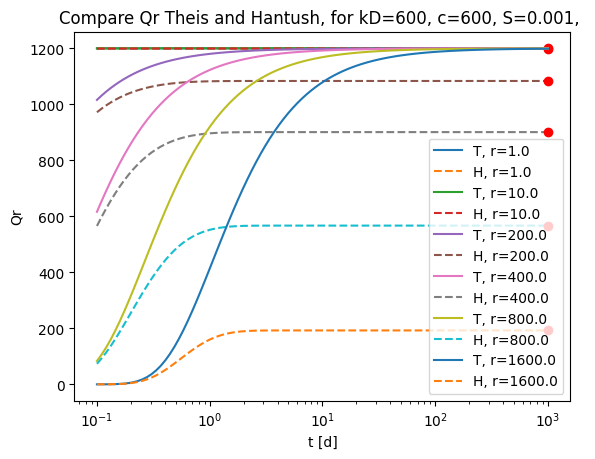

In [32]:
def QrThei(r, t, Q, S, kD):
    u = r ** 2 * S / (4 * kD * t)
    return Q * np.exp(-u)
def QrHant(r, t, Q, S, kD, c):
    return -kD * 2 * np.pi * r * ds_dr(r, t, Q, S, kD, c)

t = np.logspace(-1, 3, 100)
rs = [1.0, 10.0, 200., 400., 800., 1600.]
S, kD, c = 0.001, 600, 600

fig, ax = plt.subplots()
ax.set(title=f"Compare Qr Theis and Hantush, for kD={kD}, c={c}, S={S}, ",
       xlabel='t [d]', ylabel="Qr", xscale='log')
for r in rs:
    ax.plot(t, QrThei(r, t, Q, S, kD), label=f"T, r={r}")
    ax.plot(t, QrHant(r, t, Q, S, kD, c), '--', label=f"H, r={r}")
    ax.plot(t[-1], QH_steady(r, Q, kD, c), 'ro')
ax.legend()

-------